<a href="https://colab.research.google.com/github/glorivaas/Machine_Learning25/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 5 - Kernel Methods

### Author: Gloria Rivas

##**Why does the SVM's decision boundary in the higher-dimensional (3D) feature space not look like a “flat” hyperplane?**

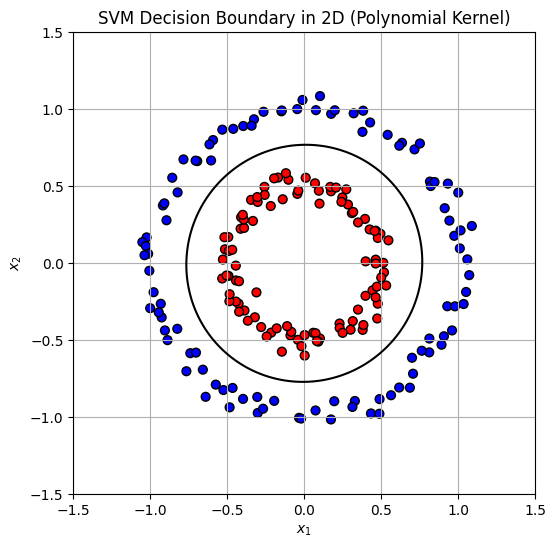

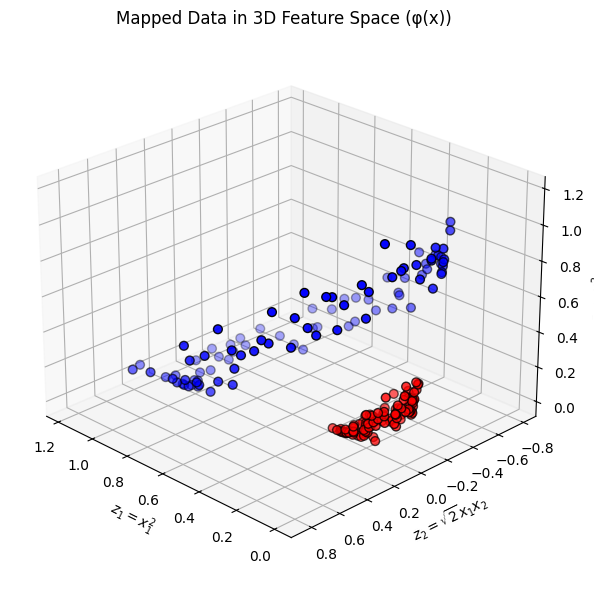

<Figure size 640x480 with 0 Axes>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D

X, y = make_circles(n_samples=200, factor=0.5, noise=0.05, random_state=1)

clf = SVC(kernel="poly", degree=2, C=10)
clf.fit(X, y)

x1 = np.linspace(-1.5, 1.5, 300)
x2 = np.linspace(-1.5, 1.5, 300)
x1_grid, x2_grid = np.meshgrid(x1, x2)
grid_points = np.c_[x1_grid.ravel(), x2_grid.ravel()]
decision_values = clf.decision_function(grid_points).reshape(x1_grid.shape)

fig, ax = plt.subplots(figsize=(6, 6))
ax.contour(x1_grid, x2_grid, decision_values, levels=[0], colors='black', linewidths=1.5)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', s=40)
ax.set_title("SVM Decision Boundary in 2D (Polynomial Kernel)")
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_aspect("equal")
ax.grid(True)

def phi(X):
    x1 = X[:, 0]
    x2 = X[:, 1]
    return np.c_[x1**2, np.sqrt(2)*x1*x2, x2**2]

Z_mapped = phi(X)

fig3d = plt.figure(figsize=(8, 6))
ax3d = fig3d.add_subplot(111, projection='3d')
ax3d.scatter(Z_mapped[:, 0], Z_mapped[:, 1], Z_mapped[:, 2], c=y, cmap='bwr', edgecolors='k', s=40)
ax3d.set_title("Mapped Data in 3D Feature Space (φ(x))")
ax3d.set_xlabel('$z_1 = x_1^2$')
ax3d.set_ylabel('$z_2 = \sqrt{2}x_1x_2$')
ax3d.set_zlabel('$z_3 = x_2^2$')
ax3d.view_init(elev=25, azim=135)

plt.tight_layout()
plt.show()


ax2.set_title("Hyperplane in 3D Feature Space")
ax2.set_xlabel('$z_1 = x_1^2$')
ax2.set_ylabel('$z_2 = \sqrt{2}x_1x_2$')
ax2.set_zlabel('$z_3 = x_2^2$')
ax2.view_init(30, 45)

plt.tight_layout()
plt.show()


In the 2D plot, we trained an SVM on data that is nonlinearly separable (two classes arranged in concentric circles). The SVM, using a polynomial kernel of degree 2, builds a circular decision boundary.

It looks curved, because in the original feature space the classes are not linearly separable.

This matches indeed our intuition; the best way to separate these circles is with a circular boundary.

In the 3D plot, we mapped the original 2D data using the transformation:

$$
\phi(x_1, x_2) = \left[ x_1^2,\ \sqrt{2}x_1x_2,\ x_2^2 \right]
$$

transforming the curved data into a new space where the two classes become linearly separable, as one class is higher in the vertical direction. As a result, a flat hyperplane can now separate them.

**Conclusion**: The decision surface is mathematically a flat hyperplane in the 3D space created by the kernel. It only appears curved when seen through the lens of the original input space because the transformation is nonlinear.

##**Explain why a hyperplane in 3D becomes a circular (or elliptical) curve when viewed back in the original 2D plane of the dataset.**

As we have just discussed, the transformation used by the polynomial kernel is nonlinear, a flat surface like a hyperplane in the 3D feature space becomes a nonlinear curve (like a circle or ellipse) when projected back to the original 2D space.
Let's use an example to visualize this.
<br>The SVM finds a linear boundary (hyperplane) in the 3D space defined by:
$$
\phi(x_1, x_2) = \left[ x_1^2,\ \sqrt{2}x_1x_2,\ x_2^2 \right]
$$
Imagine we have this simple decision plane:

$$𝑧_1
+
𝑧_3
=
1$$
But remember:

$$𝑧_1=𝑥_1^2$$

$$𝑧_3=x_2^2$$


So when you go back to 2D, this equation becomes:

$$𝑥_1^2 + x_2^2=1$$
Which is the equation of a circle

Finally, we are asked to **include a discussion illustrating the geometry behind the mapping
$ϕ(x) $
and the resulting decision boundary.**

---

In many machine learning problems, the data is not linearly separable in its original input space, as in the examples we have seen in this notes.

As a solution, kernel methods implicitly transform the input data into a higher-dimensional feature space using a mapping function:

$$
\phi: \mathbb{R}^n \rightarrow \mathbb{R}^m \quad \text{with} \quad m > n
$$

This transformation, $\phi(x)$, is often nonlinear, making the data linearly separable in the feature space.

- The decision boundary is always linear in the feature space.
- When mapped back, this boundary becomes nonlinear in the original input space, letting us handle complex data structures.

All this is known as the kernel trick and is the main idea behinf this task.
